In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import math
import locale

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

import seaborn as sn

In [2]:
b_name = []
place=[]
price=[]
area=[]
pr_sqft=[]
c_status=[]
possession=[]
desc=[]
city=[]
builder_name=[]

for i in range(1, 40):#(1-39)
    URL = 'https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page={}&_=1658556030708'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    # tag div class name -_2kHMtA
    for x in soup.find_all('div', attrs={'class' : 'infoWrap'}):#1-entire block

        t = x.find('div', attrs={'class' : 'title-line'})
        if t is None:
            b_name.append(np.NaN)
        else:
            b_name.append(t.text)
        pr = x.find('a', attrs={'class' : 'projName'})
        if pr is None:
            builder_name.append(np.NaN)
        else:
            builder_name.append(pr.text)
        p = x.find('div', attrs={'class' : 'locWrap'})
        if p is None:
            place.append(np.NaN)
        else:
            place.append(p.text)
        c = x.find('span', attrs={'class' : 'cityName'})
        if c is None:
            city.append(np.NaN)
        else:
            city.append(p.text)
        po = x.find('ul', attrs={'class' : 'listing-details'})
        if po is None:
            possession.append(np.NaN)
        else:
            possession.append(po.text)
            
        pri = x.find('div', attrs={'data-type' : 'price-link'})
        if pri is None:
            price.append(np.NaN)
        else:
            price.append(pri.text)
        
        a = x.find('td', attrs={'class' : 'size'})
        if a is None:
            area.append(np.NaN)
        else:
            area.append(a.text)
        d = x.find('tr', attrs={'class' : 'hcol'})
        if d is None:
            desc.append(np.NaN)
        else:
            desc.append(d.text)
        prs = x.find('td', attrs={'class' : 'lbl rate'})
        if prs is None:
            pr_sqft.append(np.NaN)
        else:
            pr_sqft.append(prs.text)
        cs = x.find('td', attrs={'class' : 'val'})
        if cs is None:
            c_status.append(np.NaN)
        else:
            c_status.append(cs.text)

In [3]:
City1 = []
place1 = []
city1 = []
for c1 in city:
    City1.append(c1.split(','))
for c2 in City1:
    place1.append(c2[0])
    city1.append(c2[1])

In [4]:
Area = []
for i in area:
    Area.append(int(i))

In [5]:
priceInNumber = []
for pr in price:
    x=pr.split()
    j=float(x[0])
    f=0.0
    if(x[1]=='L'):
        f=j*100000
    if(x[1]=='Cr'):
        f=j*10000000
    f=math.ceil(f)
    priceInNumber.append(f)

In [6]:
Square_ft1 = []
Square_ft2 = []
Square_ft3 = []
for sqft1 in pr_sqft:
    Square_ft1.append(sqft1.replace(',',''))
for sqft2 in Square_ft1:
    Square_ft2.append(sqft2.replace(' / sq ft',''))
for sqft3 in Square_ft2:
    Square_ft3.append(int(sqft3))

In [7]:
locale.setlocale(locale.LC_ALL, 'en_IN.UTF-8') 
currency_list = [locale.currency(num, grouping=True) for num in priceInNumber]
# print(currency_list)

In [8]:
df = pd.DataFrame()
df['Name']=np.arange(0,len(df))
df['BHK']=np.arange(0,len(df))
df["Area"] = Area
df["Per sqft"] = Square_ft3
df["Price in Rupees"] = currency_list
df["Construction status"] = c_status
df["Place"] = place1
df["City"] = city1
df["Possession"] = possession
for i in range(0,len(df)):
    a=b_name[i].split(' in ')
    df['BHK'][i]=a[0]
    if len(a)>=2:
        df['Name'][i]=a[1]
    else:
        df['Name'][i]=''

In [9]:
df.to_excel(r"C:\\Users\\issai\\WebScpProj.xlsx")
df

,Name,BHK,Area,Per sqft,Price in Rupees,Construction status,Place,City,Possession
0,Ecogreen Casa Traimbak,3 BHK Apartment,1571,4200,"₹ 65,98,000.00",Under Construction,Gundlapochampally,Hyderabad,Possession by Feb 2024New
1,Elemental Village,4 BHK Villa,1930,7700,"₹ 1,48,00,000.00",Under Construction,Patancheru,Hyderabad,Possession by Nov 20244 BathroomsNew
2,Riddhi Laxman County,4 BHK Villa,4157,7200,"₹ 2,99,00,001.00",Under Construction,Tukkuguda,Hyderabad,Possession by Feb 2024New
3,APR Praveens Higheria,3 BHK Apartment,1355,4500,"₹ 60,97,000.00",Under Construction,Patancheru,Hyderabad,Possession by Oct 2023New
4,Sri GREENTECH O2 Community,4 BHK Villa,3183,5500,"₹ 1,75,00,000.00",Under Construction,Ramachandrapuram,Hyderabad,Possession by Apr 2023New
...,...,...,...,...,...,...,...,...,...
775,Svadha Mackennas,3 BHK Apartment,1440,4305,"₹ 62,00,000.00",Ready to move,Kollur,Hyderabad,Resale
776,,3 BHK Apartment,1586,5044,"₹ 79,99,000.00",Ready to move,Bairagiguda,Hyderabad,4 - 5 years old3 BathroomsResale
777,,10 BHK Independent House,7000,4857,"₹ 3,40,00,000.00",Ready to move,LB Nagar,Hyderabad,Resale
778,,2 BHK Apartment,1450,5517,"₹ 80,00,000.00",Under Construction,Pragathi Nagar Kukatpally,Hyderabad,2 BathroomsResale East facing


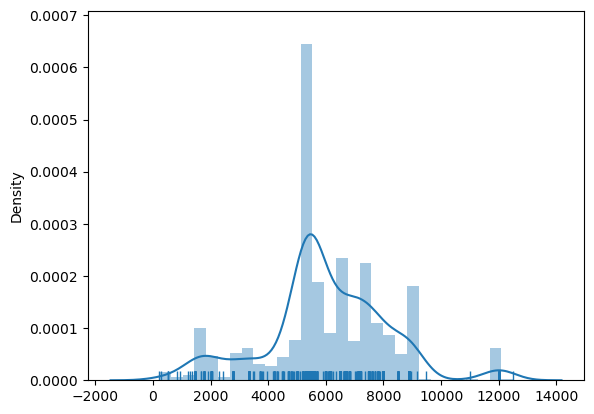

In [10]:
per_sqfeet = sn.distplot(Square_ft3, rug = True)

plt.show()

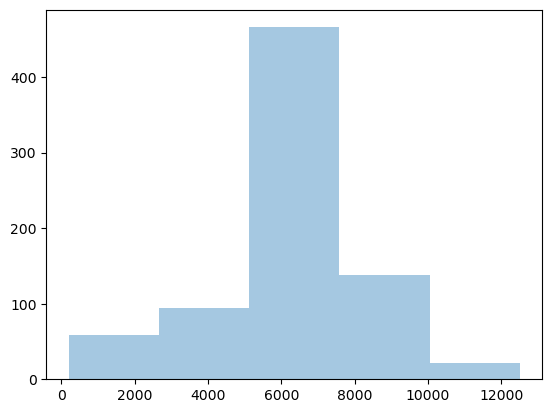

In [11]:
per_sqfeet = sn.distplot(Square_ft3, kde = False, rug = False, bins = 5)

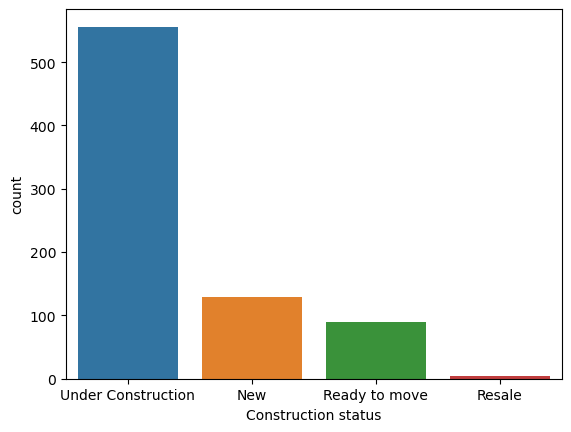

In [12]:
sn.countplot(x = 'Construction status',data = df)  
plt.show() 

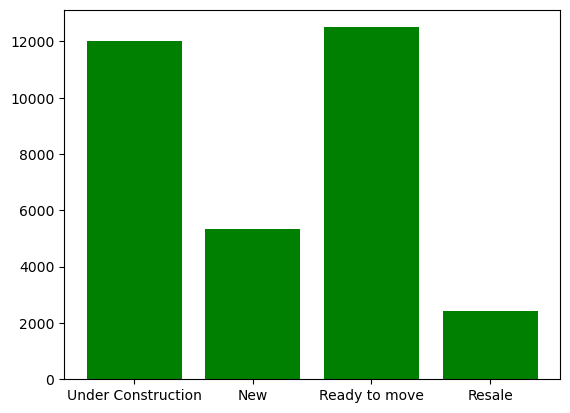

In [13]:
plt.bar(c_status, Square_ft3,color = 'green')

plt.show();

<AxesSubplot:xlabel='Construction status', ylabel='Per sqft'>

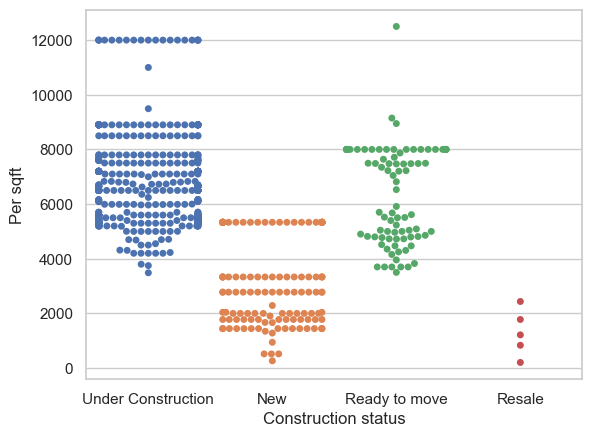

In [16]:
sn.set(style='whitegrid')
fmri = sn.load_dataset("fmri")

sn.swarmplot(x="Construction status", y="Per sqft", data=df)

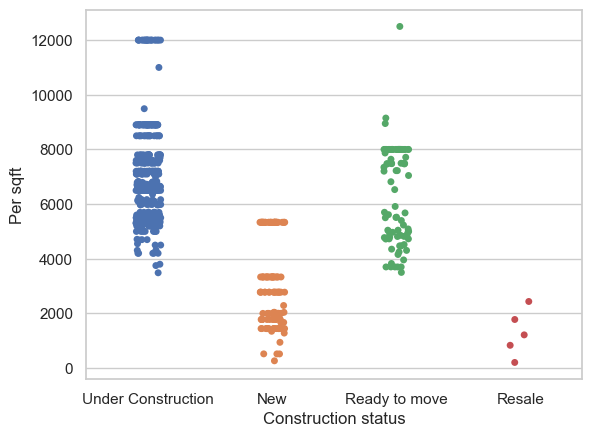

In [17]:
sn.stripplot(x="Construction status", y="Per sqft", data=df)

plt.show()

<AxesSubplot:xlabel='Per sqft', ylabel='BHK'>

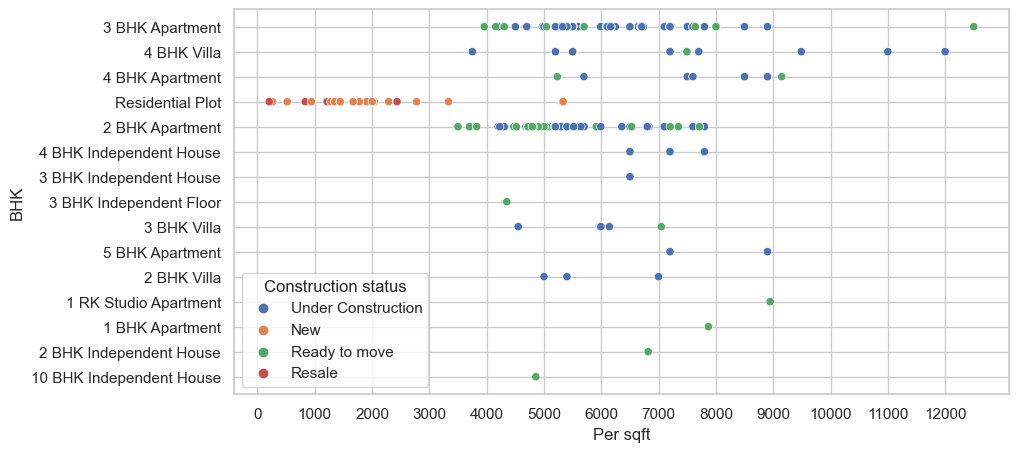

In [18]:
sn.set(style='whitegrid')

# seaborn.scatterplot(x="Construction status",y="Per sqft",hue="BHK",data = df)

plt.figure(figsize=(10,5), dpi = 100)

numOfEle = 13000

list1 = range(numOfEle)

plt.xticks(list1[::1000])

sn.scatterplot(x="Per sqft",y="BHK",hue="Construction status",data = df)

# plt.xticks(np.arange(1000,13000, 1))--------------> Ask Mehar(Taking longer time to execute)
